# Simulating Experimental Data 

##### Author: Bill Thompson (biltho@mpi.nl) & Alan Nielsen (alanksnielsen@gmail.com)

---------------

##### Summary
This notebook shows how it is possible to simulate experimental data using Python. 

We begin with a brief discussion of why to simulate experimental data. The code-based sections of the notebook first show how to generate random binomial response data using python, and then how to use this functionality to simulate a full experiment. We'll begin by simulating random responses, then simulate some biased responses, and finally simulate the full experiment using the comparison-specific imputed mean predictions from the previous session.  

-------------- 

### 1: Introduction: why simulate experimental data?
Simulating experimental data seems like a strange thing to do: we're going to run the experiment anyway, and we don't know what participants are going to do (isn't that the point of the experiment?). So why would we want to simulate the experiment, and how would we even do that?

Here are a few of the things you can do if you have simulated experimental data:

- dry-run your stats (useful for: pre-registration, efficiency post-data-collection)
- dry-run your design (did you forget to include a condition?)
- dry-run your visualisation
- generally get to know your data structure
- more reasons?

###### 1.1: Three ways to simulate a single participant: random assosciations, uniform assosciations, and varied assosciations

We'll consider three ways to go about simulating data here. 

1. First, we'll simpy ask how to simulate a single participant who behaves completelty randomly.
2. Second, we'll ask how to simulate a participant who behaves in exactly the same way for all assosciations. 
3. Finally, we'll show how to model a participant who responds differentially to different domain pairs. 

We'll first focus on predicting trial-by-trial individual decisions (consistent versus inconsistent pairings). 

--------------------------------

### 2: Simulating a Participant: the basics

In this experiment, each trial results in what we call a "consistent" mapping (1) or an inconsistent mapping (0). Which kind of mapping the participant produces is always a *random* variable -- the same participant might take the same trial before and after lunch and give a different response. We should build this randomness into our predictions.


###### 2.0 (Optional detail) The Binomial Distribution
Luckily, there's a tried and tested statistical formulation for a random variable that can ony result in a 1 or a 0. This statistical formulation is known as the Binomial distribution [(wikipedia)](https://en.wikipedia.org/wiki/Binomial_distribution), and is often explained as a coin-flipping procedure. If you flip a coin and it lands on heads, you have completed a single binomial trial (n = 1) and observed a success (1). If the coin had landed on Tails, you would have completed a single binomial trial (n = 1) which resulted in a failure (0).

The binomial distribution only has two parameters: $n$, the number of times you flip the coin, and $p$, the probability of a success (1) on any individual trial. If the coin is fair, then $p$ = .5 (an unbiased coin lands on heads as often as tails, in the long run). If the coin is biased to always land on heads (success, 1), then $p = 1$. If the coin is biased to always land on Tails (failure, 0), then $p = 0$. Any value of $p$ between zero and one is allowed, and means we can model a whole continuum of biases in both directions.  

###### 2.1: Flipping a coin in Python
In python, we can use the binomial function to flip potentially biased coins (in stats speak: conduct binomial trials). Each time we want to conduct binomial trials, we'll have to tell numpy how many flips we want to make ($n$) and what we want the probability of success to be on each trial ($p$). Every time we run the code, we'll get a new outcome. 

Here's an example flipping an unbiased coin just once. See how many times you have to re-run the code in this cell before the outcome changes. Then maybe try changing the $p$ parameter and see how this affects the result.    

In [1]:
# import the numpy module (numpy provides the binomial fucntion we need -- it is roughly the same as rbinom in R)
import numpy as np

# call numpy's biomial function and assign the result to the variable "outcome" 
outcome = np.random.binomial(n = 1, p = .5)

print "You flipped a coin: the result was: ", outcome

You flipped a coin: the result was:  1


The code above is the most important part of simulating data: generating biased but random samples from the Binomial distribution (flipping a biased coin!). The rest of the logic behind data simulation is all about using this function in the right place, such that we can generate the right coin flips. 

For example, let's say we wanted to model a single participant providing random responses to 10 trials, and count how many were "consistent" (how many flips resulted in a 1). We can do this with a single call to the coin flipping function: 

In [2]:
# flip an unbiased coin 10 times, and count how many times the result is 1 (rather than zero)
number_of_successes = np.random.binomial(n = 10, p = .5)

print number_of_successes

5


When you're comfortable with how this function works and the logic behind the idea of flipping biased coins to generate random data, move on to the next section. The next section shows how we can use this function to insert simulated data into a dataframe that looks like the dataframe that would result from running the experiment.

-------

### 3: Simulating a Full Experiment

One of the major advantages of seperating trial structure generation from the experimental interface is that we are able to use the trial generation procedure (discussed earlier by Yasamin) to generate a dataframe that looks just like experimental results, without anybody having to take the experiment.  

This same seperation allows a two-step method to simulate data experimental data:

1.   Generate the trial structure for a full experiment
2.   Fill in the Responses column of this dataset with simulated data

For the pursposes of this session, we'll assume that step 1. has already been completed: we have generated a dataframe whose rows each correspond to an individual trial in the experiment: minimally, we require that each row specifies which domain Comparison (e.g. Pitch, Size) is being tested in the trial. We first need to read in this pre-computed dataframe.

#### 3.1: Reading in a Trial Structue Dataframe

The file `SimTrials.csv`, located in the `data` folder, is a pre-computed trial structure dataframe. We can read this in like any other dataframe using the Python package Pandas:

In [4]:
# we'll need the Pandas module (we'll shorten it's name to pd for convenience)
import pandas as pd

# read in the pre-computed trial-structure dataframe
# the file "SimTrials" is a dataframe that Alan made beforehand
simulated_trials = pd.read_csv('SimTrials.csv')

# and take a look at the first few rows using.head()
simulated_trials.head()

,Unnamed: 0,Id,TrialNum,Focal1,Focal2,Focal3,Inducer,Concurrent,InducerL,IndDomainL,...,ConTokenR,LeftPair,Resp,IndDomainL2,IndDomainR2,ConDomainL2,ConDomainR2,IndCon,ConInd,Comparison
0,1,Amp-Size-Speed-1,1,Amp,Size,Speed,Affect,Amp,Affect-EB-H,Affect,...,H,H L,NaN,Affect EB,Affect EB,Amp,Amp,Affect EB-Amp,Amp-Affect EB,Affect EB-Amp
1,2,Amp-Size-Speed-1,2,Amp,Size,Speed,Size,Pitch,Size-Triangles-L,Size,...,H,L L,NaN,Size,Size,Pitch,Pitch,Size-Pitch,Pitch-Size,Pitch-Size
2,3,Amp-Size-Speed-1,3,Amp,Size,Speed,Affect,Amp,Affect-EB-H,Affect,...,L,H H,NaN,Affect EB,Affect EB,Amp,Amp,Affect EB-Amp,Amp-Affect EB,Affect EB-Amp
3,4,Amp-Size-Speed-1,4,Amp,Size,Speed,Brightness,Speed,Brightness-Diamonds-L,Brightness,...,H,L L,NaN,Brightness,Brightness,Speed,Speed,Brightness-Speed,Speed-Brightness,Brightness-Speed
4,5,Amp-Size-Speed-1,5,Amp,Size,Speed,Color,Size,Color-RY-H,Color,...,H,H L,NaN,Color RY,Color RY,Size,Size,Color RY-Size,Size-Color RY,Color RY-Size


Each row of this dataset provides the details we need to be able to simulate a response to each trial. Since we're simulating data, we don't need to worry about things like stimulus position on the screen etc. For the pruposes of this excersise, all we need to know is which domain comparison is in focus on this trial. We can extract this information from each row of the dataframe by looking at the "Comparison" column.   

In [5]:
# let's check at which comparison is being made in the first trial

# first isolte the row corresponding to the first trial (by calling .loc[0])
first_trial = simulated_trials.loc[0]

# and print the comparison
print first_trial['Comparison']

Affect EB-Amp


So the first trial compared Affect EB and Amplitude. But we could have checked any row of the dataframe. Perhaps try changing the number inside .loc[0] above to see which comparisons were in focus on other trials.

#### 3.2: Filling a dataframe with Simulated Data

Now we can start to generate some simulated data. Our procedure for this is roughly as follows:

1.   Cycle through each row of the pre-computed trial structure dataframe
2.   At each row, read off the Comparison
3.   At each row, flip a coin to generate a response (potentially fliping a different coin depending on the comparison)
4.   Add the results of this coin flip into a new colum at this row.
5.   Save the filled-in dataframe.

We'll demonstrate this procedure first by filling the dataframe with random data.

###### 3.2.1: Random Simulated Data

Pandas dataframes have an extremely useful function (.apply) that takes care of much of the work for us. This function provides a way to create a new column in the dataframe by:

- cycling through every row
- applying a function to the row
- using the output of this function as the value that fills this row in the new columns  

Now we just need write a function that reads a row and returns some random data, by flipping an unbiased coin just like we did above. In fact, in this case our function doesn't even need to ready anything from the row, since it produces the same random response in to any Comparison.

In [6]:
# a function that returns the results of a single coin flip 
def random_response(row):
    return np.random.binomial(n = 1, p = .5)

Now we need to apply this function to our simulated Trial Structure dataset, and assign the results of this operation to a new column in the dataset:

In [7]:
# let's call our new column "RandomResponse"
# notice the "axis = 1" argument in .apply(). This tells pandas to cycle over rows (rather than columns)
simulated_trials['RandomResponse'] = simulated_trials.apply(random_response, axis = 1)

Let's take a look at the first few rows now:

In [8]:
simulated_trials.head()

,Unnamed: 0,Id,TrialNum,Focal1,Focal2,Focal3,Inducer,Concurrent,InducerL,IndDomainL,...,LeftPair,Resp,IndDomainL2,IndDomainR2,ConDomainL2,ConDomainR2,IndCon,ConInd,Comparison,RandomResponse
0,1,Amp-Size-Speed-1,1,Amp,Size,Speed,Affect,Amp,Affect-EB-H,Affect,...,H L,NaN,Affect EB,Affect EB,Amp,Amp,Affect EB-Amp,Amp-Affect EB,Affect EB-Amp,1
1,2,Amp-Size-Speed-1,2,Amp,Size,Speed,Size,Pitch,Size-Triangles-L,Size,...,L L,NaN,Size,Size,Pitch,Pitch,Size-Pitch,Pitch-Size,Pitch-Size,1
2,3,Amp-Size-Speed-1,3,Amp,Size,Speed,Affect,Amp,Affect-EB-H,Affect,...,H H,NaN,Affect EB,Affect EB,Amp,Amp,Affect EB-Amp,Amp-Affect EB,Affect EB-Amp,1
3,4,Amp-Size-Speed-1,4,Amp,Size,Speed,Brightness,Speed,Brightness-Diamonds-L,Brightness,...,L L,NaN,Brightness,Brightness,Speed,Speed,Brightness-Speed,Speed-Brightness,Brightness-Speed,1
4,5,Amp-Size-Speed-1,5,Amp,Size,Speed,Color,Size,Color-RY-H,Color,...,H L,NaN,Color RY,Color RY,Size,Size,Color RY-Size,Size-Color RY,Color RY-Size,1


We can also check the distribution of our new variable, RandomResponse, by calling another useful Pandas function on our new colum -- .hist() - which will visualise the histogram of values in the colum:

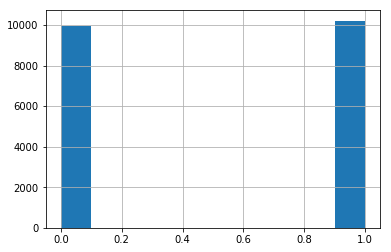

In [9]:
# tell the notebook to allow figures inline
%matplotlib inline

# draw a histgoram of the values in our new "RandomResponse" column of the simulated trials dataset.
simulated_trials.RandomResponse.hist()

The figure above will change every time we re-run the code, because the coin flipping procedure is random, but it should always approximate a fairly even balance between zeros and ones, since we were flipping a fair coin every time. Now let's see how to flip a biased coin to generate responses. 

###### 3.2.2: Uniformly Biased Simulated Data

Instead of just flipping a fair coin to generate simulated data, we can instead make the assumption that the coin is biased. First we'll geenrate some data by assuming that all participants are responding with exactly the same strong bias for consistent mappings, and that this bias for consistency does not vary by domain comparison.

Implementing this change requires a minor modification to the "random_response" function above.

In [10]:
# This function flips a coin that is biased to land on 1 85% of the time
def uniformly_biased_response(row):
    return np.random.binomial(n = 1, p = .85)

# create a new column called "BiasedResponse" by applying our function "uniformly_biased_response" to every row 
simulated_trials['BiasedResponse'] = simulated_trials.apply(uniformly_biased_response, axis = 1)

Now we have to sets of simuated responses on every row, RandomResponse and BiasedResponse:

In [11]:
# print out the first few rows
# scroll all the way to the right to see our new columns
simulated_trials.head()

,Unnamed: 0,Id,TrialNum,Focal1,Focal2,Focal3,Inducer,Concurrent,InducerL,IndDomainL,...,Resp,IndDomainL2,IndDomainR2,ConDomainL2,ConDomainR2,IndCon,ConInd,Comparison,RandomResponse,BiasedResponse
0,1,Amp-Size-Speed-1,1,Amp,Size,Speed,Affect,Amp,Affect-EB-H,Affect,...,NaN,Affect EB,Affect EB,Amp,Amp,Affect EB-Amp,Amp-Affect EB,Affect EB-Amp,1,1
1,2,Amp-Size-Speed-1,2,Amp,Size,Speed,Size,Pitch,Size-Triangles-L,Size,...,NaN,Size,Size,Pitch,Pitch,Size-Pitch,Pitch-Size,Pitch-Size,1,1
2,3,Amp-Size-Speed-1,3,Amp,Size,Speed,Affect,Amp,Affect-EB-H,Affect,...,NaN,Affect EB,Affect EB,Amp,Amp,Affect EB-Amp,Amp-Affect EB,Affect EB-Amp,1,1
3,4,Amp-Size-Speed-1,4,Amp,Size,Speed,Brightness,Speed,Brightness-Diamonds-L,Brightness,...,NaN,Brightness,Brightness,Speed,Speed,Brightness-Speed,Speed-Brightness,Brightness-Speed,1,1
4,5,Amp-Size-Speed-1,5,Amp,Size,Speed,Color,Size,Color-RY-H,Color,...,NaN,Color RY,Color RY,Size,Size,Color RY-Size,Size-Color RY,Color RY-Size,1,1


###### 3.2.3:  Simulating Data Conditional on Comparison

With these tools we are in a position to achieve our real aim: to simulate experimental data by modelling participants' biases about the domain comparisons.   

One way to do this is to flip a differently biased coin to generate reponses for different comparisons. Of course to do this we would need to specify a bias (a $p$ paramter for the coin-flip) for every possible pair of domains that could be compared.

We already have a version of these biases: in the previous session, we made predictions about the mean proportion of consistent responses to expect for any possible pair of domains. We saved these data into a file called `ImputedPredictions.csv`, which is. Let's read in these data: 

In [13]:
predictions = pd.read_csv('ImputedPredictions.csv')

predictions.head()

,Unnamed: 0,Comparison,Prediction,MagSym,Same1,ImputedPrediction,ImputedMean
0,1,Affect EB-Amp,1,1,1,1,0.881818
1,2,Affect EB-Brightness,1,1,1,1,0.872727
2,3,Affect EB-Color RB,1,1,1,1,0.611111
3,4,Affect EB-Color RG,0,1,0,0,0.038462
4,5,Affect EB-Color RY,1,1,1,0,0.318182


"ImputedMean" is the column we are interested in, since this is our predicted proportion of consistent reponses for each domain. 

We need to be able to tell our data simulation function how to look up the correct bias for any given pair of domains. To make this easier, let's create a python dictionary whose keys are comparisons and whose values are the ImputedMean for that comparison:

In [14]:
# make a dictionary out of the Comparison and ImputedMean columns in our predictions dataset
bias_lookup = dict(zip(predictions.Comparison, predictions.ImputedMean))

# and let's have a look at the entries in the dictionary
bias_lookup

{'Affect EB-Amp': 0.88181818181799998,
 'Affect EB-Brightness': 0.87272727272700001,
 'Affect EB-Color RB': 0.61111111111100003,
 'Affect EB-Color RG': 0.038461538461500001,
 'Affect EB-Color RY': 0.31818181818199998,
 'Affect EB-Color YB': 0.92307692307699996,
 'Affect EB-Noise': 0.27272727272699998,
 'Affect EB-Pitch': 0.52727272727300001,
 'Affect EB-Shape': 0.55454545454499993,
 'Affect EB-Size': 0.84545454545499998,
 'Affect EB-Speed': 0.94545454545499996,
 'Affect HS-Amp': 0.90000000000000002,
 'Affect HS-Brightness': 0.936363636364,
 'Affect HS-Color RB': 0.61111111111100003,
 'Affect HS-Color RG': 0.115384615385,
 'Affect HS-Color RY': 0.31818181818199998,
 'Affect HS-Color YB': 0.92307692307699996,
 'Affect HS-Noise': 0.16363636363600001,
 'Affect HS-Pitch': 0.58181818181800005,
 'Affect HS-Shape': 0.51818181818200004,
 'Affect HS-Size': 0.90000000000000002,
 'Affect HS-Speed': 0.98181818181799996,
 'Affect PD-Amp': 0.563636363636,
 'Affect PD-Brightness': 0.80000000000000004,

Now we can re-write our function for data simulation so that it consults this dictionary of biases at every new row, and uses the correct bias to generate a simulated response.

The function needs to do three things:

1.   Extract the current comparison from each row of the simulated_trials dataset
2.   Lookup the bias for this comparison
3.   Flip a coin with that bias to generate a response

Here's one way to implement this:

In [15]:
def simulate_response(row):
    comparison = row['Comparison'] # = step 1.
    
    bias = bias_lookup[comparison] # = step 2
    
    return np.random.binomial(n = 1, p = bias) # = step 3.

And finally we can create a new column, SimulatedResponse, in our dataset using this function:

In [16]:
# apply simulated_response to every row of the simulated trial structure dataset
simulated_trials['SimulatedResponse'] = simulated_trials.apply(simulate_response, axis = 1)

Let's finally have a quick look at the mean proportion of "consistent" simulated responses in our column SimulatedResponse, by domain:

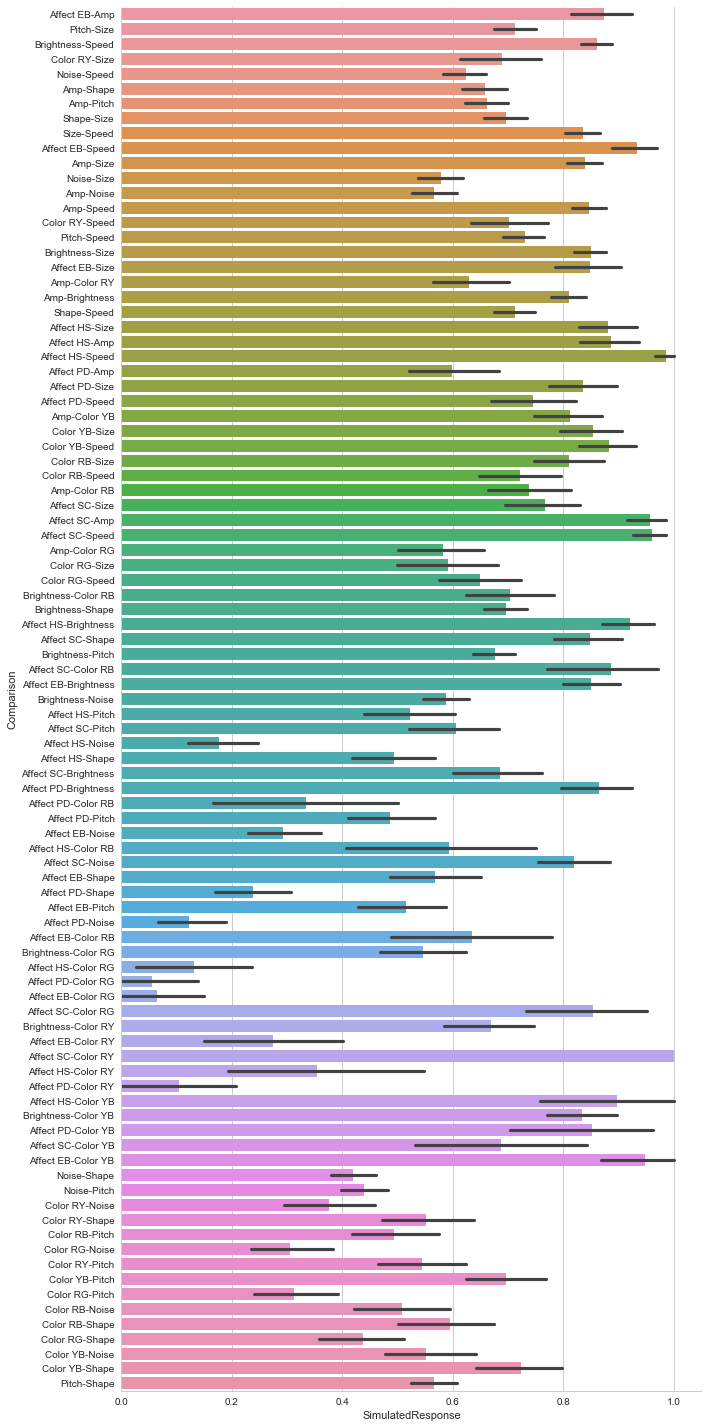

In [18]:
import seaborn as sns
sns.set(style = 'whitegrid')

g = sns.factorplot(data = simulated_trials, x = 'SimulatedResponse', y = 'Comparison', size = 20, aspect = .5, kind = 'bar')

In [19]:
# And save out the data to a new file SimulatedExperimentData
simulated_trials.to_csv('SimulatedExperimentData.csv')